# Prediction Distribution Monitoring

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

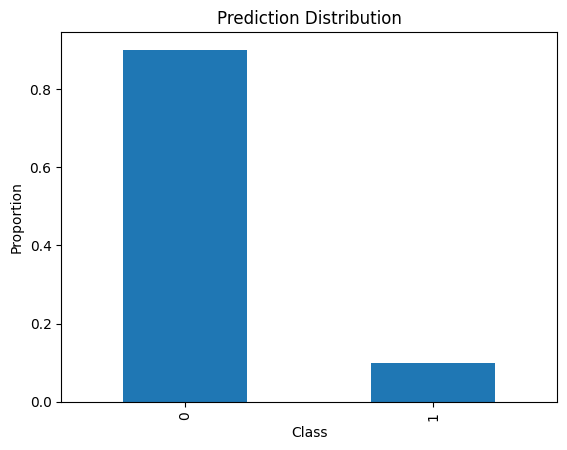

In [5]:
df_prod = pd.read_csv("prod.csv")
df_train = pd.read_csv("train.csv")

df_prod['Churn'].value_counts(normalize=True).plot(kind='bar')
plt.title("Prediction Distribution")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.show()

In [6]:
X_ref = df_train[['tenure', 'MonthlyCharges', 'TotalCharges', 'total_charges_per_tenure']].to_numpy()
X_prod = df_prod[['tenure', 'MonthlyCharges', 'TotalCharges', 'total_charges_per_tenure']].to_numpy()

In [9]:
from alibi_detect.cd import KSDrift

cd = KSDrift(X_ref, p_val=0.05)  # 5% significance level

D:\Data Science\My Projects\Telco Customer Churn Prediction\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
preds = cd.predict(X_prod)

print(preds['data']['is_drift'])  # 0 = no drift, 1 = drift
print(preds['data']['p_val'])     # p-values per feature
print(preds['data']['distance'])  # distance metric per feature

1
[3.4143075e-02 7.9470174e-03 2.3898752e-03 4.5742798e-12]
[0.14225014 0.16591722 0.18311043 0.36282668]


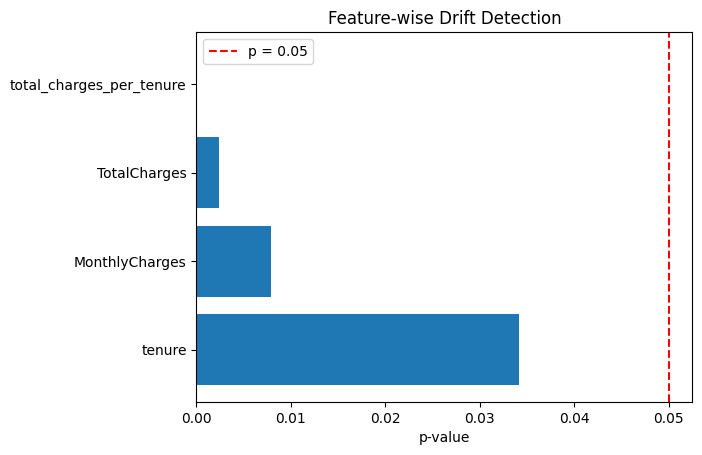

In [11]:
import matplotlib.pyplot as plt

feature_names = ['tenure', 'MonthlyCharges', 'TotalCharges', 'total_charges_per_tenure']
p_vals = preds['data']['p_val']

plt.barh(feature_names, p_vals)
plt.axvline(0.05, color='red', linestyle='--', label='p = 0.05')
plt.xlabel('p-value')
plt.title('Feature-wise Drift Detection')
plt.legend()
plt.show()